# [CptS 215 Data Analytics Systems and Algorithms](https://piazza.com/wsu/fall2017/cpts215/home)
[Washington State University](https://wsu.edu)

[Srini Badri](https://school.eecs.wsu.edu/people/faculty/), [Gina Sprint](http://eecs.wsu.edu/~gsprint/)
## MA6 Stacks, Queues and Heaps (50 pts)

<mark>Author: Nam Jun Lee</mark>

<mark>Date: November 11th, 2021</mark>

### Learner Objectives
At the conclusion of this micro assignment, participants should be able to:
* Analyze stack and queue data structures for efficiency
* Implement a binay max heap

### Prerequisites
Before starting this micro assignment, participants should be able to:
* Write object oriented Python code
* Write Markdown and code cells in Jupyter Notebook
* Understand stacks and queues
* Understand binary min heap implementation

### Acknowledgments
Content used in this assignment is based upon information in the following sources:
* Carl Kingsford's [Basic Data Structures](https://www.engage-csedu.org/find-resources/problem-set-1-basic-data-structures) problem set.

## Overview and Requirements
For this micro assignment, you are going to download this Jupyter Notebook and answer the following questions. Your answer for a problem should be in a cell *immediately* after the problem cell. *Do not modify the problem cell.*

We are going to explore the efficiency of two different queue implementations. This micro assignment includes conceptional questions and programming.

### Conceptual Questions (25 pts)
Suppose you are given a (strange) computer that can only perform the following instructions (in addition to if and while):
* `S = create_stack()` create stack makes a new stack `S`
* `i = S.pop()` removes the top item from stack `S` and places it in variable `i`
* `S.push(i)` makes item `i` the top item in stack `S`

Solve the following problems and *justify* your answers:
1. (15 pts) Show how you can use these operations to implement a queue (operations `Q = create_queue()`, `enqueue(i)`, `i = dequeue()`)
    * A picture might help to explain your answer
    * Hint: take a look at the following image:
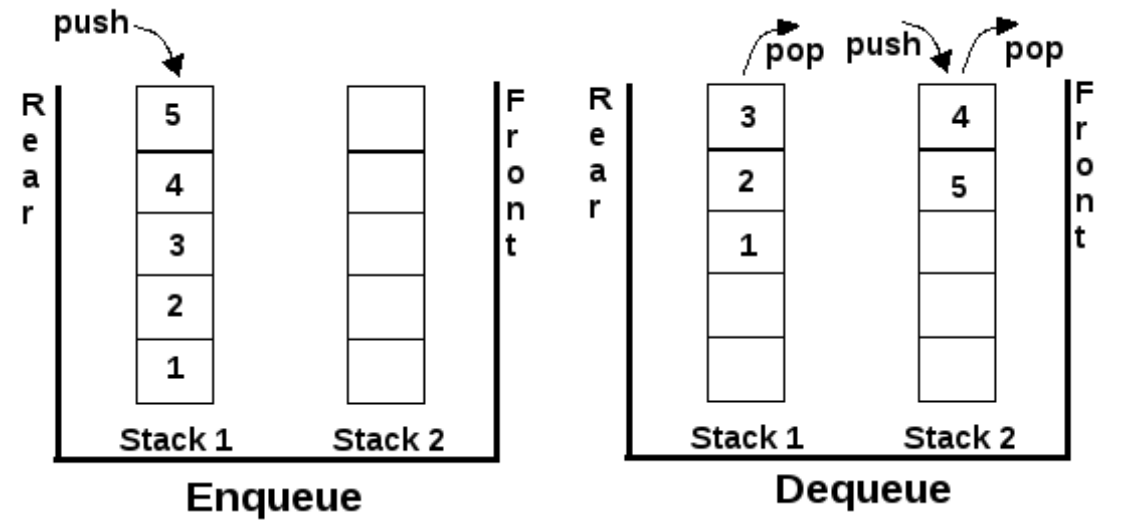
(image from http://www.algoqueue.com/algoqueue/members/get_uploaded_image.load/149)
1. (5 pts) What's the worst case running time of your dequeue implementation?
1. (5 pts) Over a series of `n` enqueues followed by `n` dequeues, how many `pop()` operations does your implementation perform?


#### Conceptual Question Answer

##### 1. Show how you can use these operations to implement a queue (operations `Q = create_queue()`, `enqueue(i)`, `i = dequeue()`)

Create Queue class:

In [96]:
# a class representing a create_queue
class create_queue:
    
    # create two stack lists
    def __init__(self):
        self.stack1 = []
        self.stack2 = []
    
    # print ouptput
    def __str__(self):
        tp1 = "[Rear] "
        tp2 = "[Rear] "
        for val in self.stack1:
            tp1 += str(val) + " "
        for vals in self.stack2:
            tp2 += str(vals) + " "
        return "Stack1\n" + tp1 + " [Front]\n\n" + "Stack2\n" + tp2 + \
               " [Front]\n"

    # enqueue operation
    def enqueue(self, value):
        self.stack1.append(value)

    # dequeue operation
    def dequeue(self):
        tp3 = "[Rear]"
        if not self.stack2:
            if not self.stack1:
                return
        self.stack2.append(self.stack1.pop(0))
        print(f'Stack1 pop item {self.stack2} in Stack2')
        print()
        return self.stack2.pop()

In [97]:
Q = create_queue()
# Insert some data
print("Enqueue items in Stack1:\n")
Q.enqueue(5)
Q.enqueue(4)
Q.enqueue(3)
Q.enqueue(2)
Q.enqueue(1)
print(Q)

# perform dequeue operations
print("Dequeue items in Stack1:\n")
Q.dequeue()
Q.dequeue()

print(Q)

Enqueue items in Stack1:

Stack1
[Rear] 5 4 3 2 1  [Front]

Stack2
[Rear]  [Front]

Dequeue items in Stack1:

Stack1 pop item [5] in Stack2

Stack1 pop item [4] in Stack2

Stack1
[Rear] 3 2 1  [Front]

Stack2
[Rear]  [Front]



##### 2. What's the worst case running time of your dequeue implementation?

The worst-case execution time of the dequeue operation is performed after stack 1 is filled with n elements. In this process, the element pop in stack 1 is pushed to stack 2 and then pop again in stack 2.  
* Therefore, worst-case of this dequeue running time is $\mathcal{O}(n)$ 

##### 3. Over a series of `n` enqueues followed by `n` dequeues, how many `pop()` operations does your implementation perform?

After n enqueues operate, n dequeues operate.
When the number of pop() operations is considered to be N, first, pop operation N is performed from stack 1 to stack 2. After that, pop operation N is performed in stack 2. In stack 2, pop operation N is equal to the number of items in stack 1. 
* Therefore, the pop operation is **n + N**.

### Implementation Questions (20 pts)

#### Binary Max Heap
Review the implementation code provided for Binary Min Heap. Modify it so that the item with maximum value is at the top of the Binary Heap. This would be a Binary Max Heap where the item with maximum value has the highest priority.

Here is the expected API of the Binary Max Heap:
* `BinaryMaxHeap()`: creates a new, empty binary max heap
* `insert(item)`: inserts the new item into the heap
* `find_max()`: returns the item at the front of the heap without removing it
* `delete_max()`: returns the item at the front of the heap and removes it
* `max_child()`: returns the index of the largest child
* `is_empty()`: returns True if the heap is empty, False otherwise
* `build_heap(list)`: builds a new heap from a list of items
* `percolate_up()`: continuously compares the item at index with its parent. If the item is greater than the parent, swap the item.
* `percolate_down()`: continuously compares the item at index with its largest child. If the item is less than the largest child, swap the item.

#### Test - Binary Max Heap
Test your implementation by building the Binary Max Heap with random data as shown below. This test code uses Python's `random` module.

```python
    h = BinaryMaxHeap()

    for i in range(1, 101):
        x = random.randint(1, 100)
        h.insert(x)

    print("Number of itmes in the priority list - Original:", len(h))

    print("Top 10 priority items:")
    for i in range(1, 11):
        print(h.del_max(), end= " ")
    print()

    print("Number of items in the priority list - Updated:", len(h))
```

Sample test output:

    Original number of items in the priority list: 100
    Top 10 priority items:
    100 100 99 98 95 94 92 92 91 91
    Updated number of items in the priority list - Updated: 90

Note: Each student's test data would be slightly different as they are generated using a pseudo-random generator function.

#### Implementation Questions Answer

Import random module first:

In [98]:
import random

Create Binary Max Heap class:

In [99]:
# a class representing a BinaryMaxHeap
class BinaryMaxHeap:
    
    # create properties for BinaryMaxHeap class
    def __init__(self):
        self.heap_list = [0]
        self.size = 0

    # show output
    def __str__(self):
        return str(self.heap_list)

    # length of heap 
    def __len__(self):
        return self.size
    
    def __contains__(self, item):
        return item in self.heap_list

    # compare the size attribute to 0 
    def is_empty(self):
        return self.size == 0

    # find max (item at the front of the heap)
    def find_max(self):
        if self.size > 0:
            max_value = self.heap_list[1]
            return max_value
        return None

    # inserts the new item into the heap
    def insert(self, item):
        self.heap_list.append(item)
        self.size += 1
        self.percolate_up(self.size)

    # delete max (item at the front of the heap)
    def del_max(self):
        max_value = self.heap_list[1]
        self.heap_list[1] = self.heap_list[self.size]
        self.size = self.size - 1
        self.heap_list.pop()
        self.percolate_down(1)
        return max_value

    # largest child
    def max_child(self, index):
        if index * 2 + 1 > self.size:
            return index * 2
        else:
            if self.heap_list[index * 2] < self.heap_list[index * 2 + 1]:
                return index * 2 + 1
            else:
                return index * 2

    # builds a new heap from a list of items (each node down to establish heap order property)
    def build_heap(self, lst):
        idx = len(lst) // 2  
        self.size = len(lst)
        self.heap_list = [0] + lst[:]
        while idx > 0:
            self.percolate_down(idx)
            idx -= 1

    # compares the item at index with parent (if item is greater than parent, swap)
    def percolate_up(self, idx):
        while idx // 2 > 0:
            if self.heap_list[idx] > self.heap_list[idx // 2]:
                tp = self.heap_list[idx]
                self.heap_list[idx] = self.heap_list[idx // 2]
                self.heap_list[idx // 2] = tp
            idx //= 2

    # compares the item at index largest child (if item is less than largest child, swap)
    def percolate_down(self, idx):
        while (idx * 2) <= self.size:
            mx = self.max_child(idx)
            if self.heap_list[idx] < self.heap_list[mx]:
                temp = self.heap_list[mx]
                self.heap_list[mx] = self.heap_list[idx]
                self.heap_list[idx] = temp
            idx = mx


In [100]:
# test code
h = BinaryMaxHeap()

for i in range(1, 101):
    x = random.randint(1, 100)
    h.insert(x)

print("Number of items in the priority list - Original:", len(h))

print("Top 10 priority items:")
for i in range(1, 11):
    print(h.del_max(), end=" ")
print()

print("Number of items in the priority list - Updated:", len(h))


Number of items in the priority list - Original: 100
Top 10 priority items:
100 99 97 97 96 95 95 95 95 93 
Number of items in the priority list - Updated: 90


## Bonus (5 pts)
Implement a Ternary Max Heap where each node can have up to 3 children nodes. Test your implementation using similary test code as Binary Max Heap.

Here is an image showing Ternary Max Heap diagram:<br>

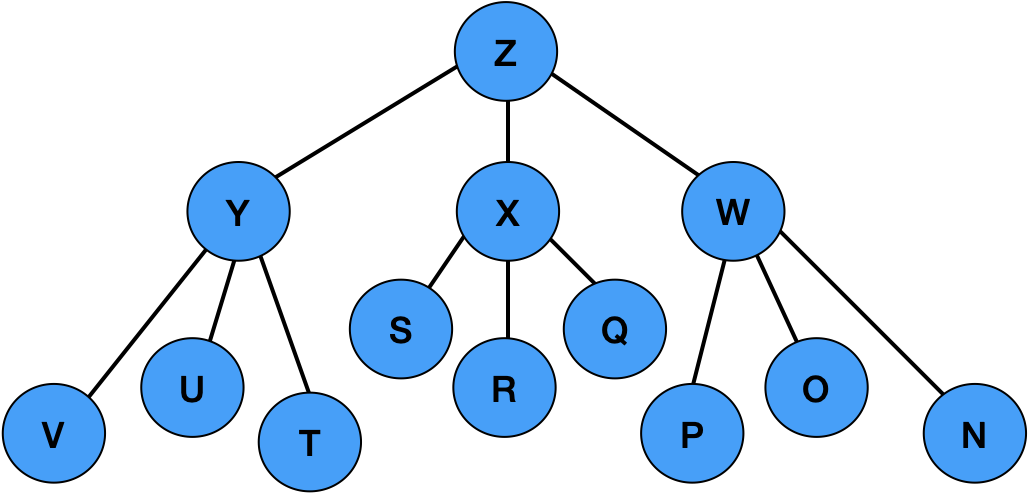

<b>Note</b>: Since this is a Bonus Points implementation, a starting code for Ternary Heap implementation is not provided.

#### Bonus Question Answer
Create Ternary Max Heap class:

In [101]:
# a class representing a TernaryMaxHeap
class TernaryMaxHeap:

    # create properties for BinaryMaxHeap class
    def __init__(self):
        
        self.heap_list = [0]
        self.size = 0
    
    # print output
    def __str__(self):
        return str(self.heap_list)

    # length of heap
    def __len__(self):
        return self.size

    def __contains__(self, item):
        return item in self.heap_list

    # compare the size attribute to 0
    def is_empty(self):
        return self.size == 0

    # find largest item (item at the front of the ternary heap)
    def find_max_ternary(self):
        if self.size > 0:
            max_val = self.heap_list[1]
            return max_val
        return None

    # inserts the new item into the ternary heap
    def insert(self, item):
        self.heap_list.append(item)
        self.size += 1
        self.percolate_up_ternary(self.size)

    # delete largest item (item at the front of the ternary heap)
    def del_max(self):
        max_val = self.heap_list[1]
        self.heap_list[1] = self.heap_list[self.size]
        self.size = self.size - 1
        self.heap_list.pop()
        self.percolate_down_ternary(1)
        return max_val

    # largest child in ternary heap
    def max_child_ternary(self, index):
        if index * 3 + 1 > self.size:
            return index * 3
        if index * 3 > self.size:
            return index * 3 - 1
        elif index * 3 + 1 < self.size:
            if self.heap_list[index * 3] < self.heap_list[index * 3 + 1]:
                return index * 3 + 1
            else:
                return index * 3
        elif index * 3 < self.size:
            if self.heap_list[index * 3 - 1] < self.heap_list[index * 3]:
                return index * 3
            else:
                return index * 3 - 1

    # builds a new heap from a ternary heap list of items
    def build_heap(self, lst):
        idx = len(lst) // 3  # any nodes past the half way point are leaves
        self.size = len(lst)
        self.heap_list = [0] + lst[:]
        while idx > 0:
            self.percolate_down_ternary(idx)
            idx -= 1

    # compares the item at index with parent (item is greater than parent, swap)
    def percolate_up_ternary(self, idx):
        while idx // 3 > 0:
            if self.heap_list[idx] > self.heap_list[idx // 3]:
                temp = self.heap_list[idx]
                self.heap_list[idx] = self.heap_list[idx // 3]
                self.heap_list[idx // 3] = temp
            idx //= 3

    # compares the item at index with largest child (item is less than the largest child, swap)
    def percolate_down_ternary(self, idx):
        while (idx * 3) <= self.size:
            mx = self.max_child_ternary(idx)
            if self.heap_list[idx] < self.heap_list[mx]:
                tp = self.heap_list[mx]
                self.heap_list[mx] = self.heap_list[idx]
                self.heap_list[idx] = tp
            idx = mx

In [102]:
# test using similary test code as Binary Max Heap
h = TernaryMaxHeap()

for i in range(1, 101):
    x = random.randint(1, 100)
    h.insert(x)

print("Number of items in the priority list - Original:", len(h))

print("Top 10 priority items:")
for i in range(1, 11):
    print(h.del_max(), end=" ")
print()

print("Number of items in the priority list - Updated:", len(h))


Number of items in the priority list - Original: 100
Top 10 priority items:
99 99 97 93 86 85 84 80 79 77 
Number of items in the priority list - Updated: 90


## Submitting Assignments
1.	Use the Blackboard tool https://learn.wsu.edu to submit your assignment. You will submit your code to the corresponding programming assignment under the "Content" tab. You must upload your solutions as `<your last name>_ma4.zip` by the due date and time.
2.	Your .zip file should contain your .ipynb file and a .html file representing your Notebook as a webpage (File->Download as->HTML).

## Grading Guidelines
This assignment is worth 50 points + 5 points bonus. Your assignment will be evaluated based on a successful compilation and adherence to the program requirements. We will grade according to the following criteria:
* 25 pts for answering the conception questions
* 20 pts for correct implementation of the Binary Max Heap
* 5 pts for for adherence to proper programming style and comments established for the class